# Virtual Screening

This notebook is for looking at the results from the Virtual Screening experiments

In [8]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import tabulate

In [2]:
import sys
sys.path.append('../')


In [3]:
from bayes_vs import dummy_oracles
from bayes_vs import acquisition
from bayes_vs import querier


In [4]:
with open('../scripts/vs_results.pick', 'rb') as fo:
    data_ = pickle.load(fo)


In [5]:
print([(k, list(v.keys())) for k, v in data_.items()])

print('\n', data_['experiments']['PlainVS'].keys())

[('oracles', ['gt', 'cheap-docking', 'expensive-docking', 'FEP']), ('experiments', ['PlainVS', 'BayesVS'])]

 dict_keys(['experiment_queriers', 'stages'])


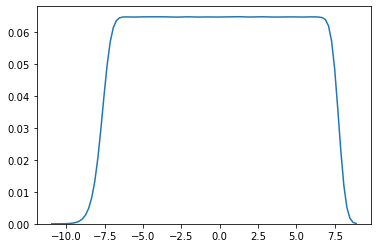

In [6]:
# We first will plot the KDE of all possible scores we can find.

all_scores = np.array(list(data_['oracles']['gt']._properties.values()))
sns.kdeplot(all_scores)

In [15]:
# We can then list the best dound by BayesVS and PlainVS 
# When run on 13.May Plain VS is doing better but not particular suprising at this stage,
# the Bayesian Regression model is not taking in that good features (ie the results of previous oracles)
# or has sensible priors. At this stage this is just to demonstrate how the process can be evaluated.

table = []

bayes_opt_scores = [elem.score for elem in data_['experiments']['BayesVS']['experiment_queriers'][-1].queries_in_time_order]
plain_vs_scores = [elem.score for elem in data_['experiments']['PlainVS']['experiment_queriers'][-1].queries]

bayes_smiles_from_bo_into_fep = set([elem.smiles for elem in data_['experiments']['BayesVS']['experiment_queriers'][-2].queries_in_time_order][100:])
bayes_is_from_bo = [elem.smiles in bayes_smiles_from_bo_into_fep for elem in data_['experiments']['BayesVS']['experiment_queriers'][-1].queries_in_time_order]


for res_name, res in [('Full Dataset', all_scores), ('BayesVS', bayes_opt_scores), ('PlainVS', plain_vs_scores)]:
    indcs = [0, 1, 2, 4, 9, 14]
    table.append([res_name] + np.sort(res)[indcs].tolist())
    
print(tabulate.tabulate(table, headers=["Method", "Top 1 Found", "Top 2 Found", "Top 3 found", "Top 5 found", "Top 15 found"]))

                Method    Top 1 Found    Top 2 Found    Top 3 found    Top 5 found    Top 15 found
------------  --------  -------------  -------------  -------------  -------------  --------------
Full Dataset  -9.79673       -9.74911       -9.74911       -9.56339       -9.43006        -9.29196
BayesVS       -9.6253        -9.45149       -9.45149       -9.32768       -8.7253         -8.58244
PlainVS       -9.6253        -9.56339       -9.45149       -9.32768       -8.90863        -8.7253


In [22]:
df = pd.DataFrame.from_dict({'score':plain_vs_scores + bayes_opt_scores, 'method': ['B.1 (VanillaVS)'] * len(plain_vs_scores) + ['B.2 (Thompson_V1)'] * len(bayes_opt_scores), 'Thompson Sampled (for FEP part)': [False] * len(plain_vs_scores) + bayes_is_from_bo})

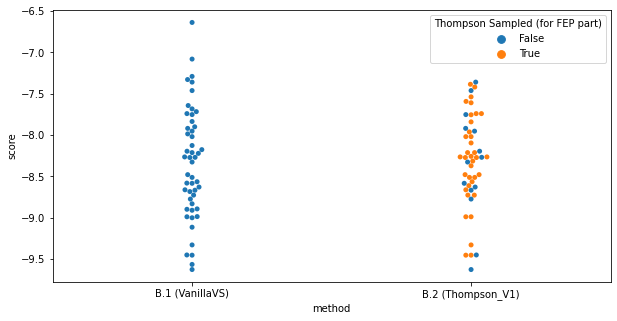

In [23]:
f, ax = plt.subplots(figsize=(10, 5))
sns.swarmplot(data=df, x="method", y="score", hue='Thompson Sampled (for FEP part)')

In [27]:

table = []

bayes_opt_scores = [elem.score for elem in data_['experiments']['BayesVS']['experiment_queriers'][-2].queries_in_time_order]
plain_vs_scores = [elem.score for elem in data_['experiments']['PlainVS']['experiment_queriers'][-2].queries]

bayes_smiles_from_bo_into_fep = set([elem.smiles for elem in data_['experiments']['BayesVS']['experiment_queriers'][-2].queries_in_time_order][100:])
bayes_is_from_bo = [elem.smiles in bayes_smiles_from_bo_into_fep for elem in data_['experiments']['BayesVS']['experiment_queriers'][-2].queries_in_time_order]

df = pd.DataFrame.from_dict({'mocked FEP score':plain_vs_scores + bayes_opt_scores, 'method': ['B.1 (VanillaVS)'] * len(plain_vs_scores) + ['B.2 (Thompson_V1)'] * len(bayes_opt_scores), 'Thompson Sampled (for FEP part)': [False] * len(plain_vs_scores) + bayes_is_from_bo})

Text(0.5, 1.0, 'Molecules picked at the FEP score stage and results obtained')

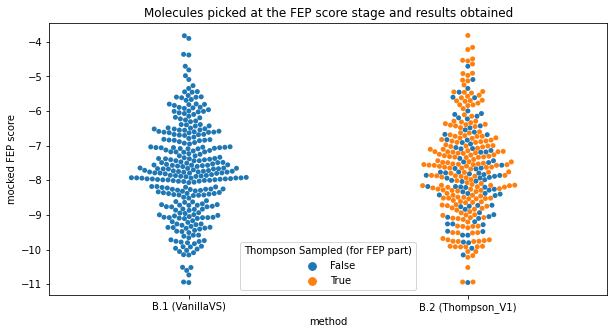

In [29]:
f, ax = plt.subplots(figsize=(10, 5))
sns.swarmplot(data=df, x="method", y="mocked FEP score", hue='Thompson Sampled (for FEP part)')
ax.set_title('Molecules picked at the FEP score stage and results obtained')